# Адаптивное сглаживание

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
import random
#rcParams['figure.figsize'] = 14,6
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.express as px

import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from datetime import timedelta as dt
import os
import plotly.io as pio 
pio.renderers.default = 'iframe'

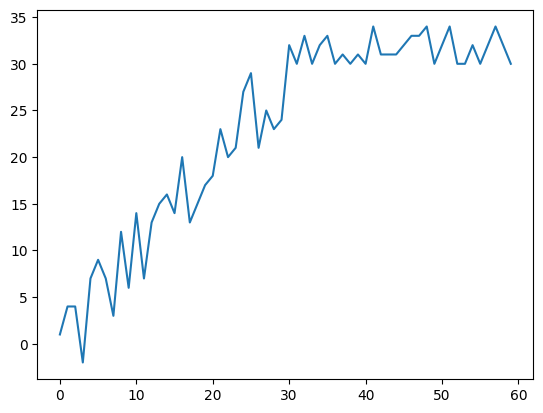

In [2]:
# Создадим какой то тренд данных с восхождением и с выходом на полочку
n_points=30
data_slopped = []
for n in range(n_points):
    data_slopped.append(n+random.randint(-5,+5))
data = np.concatenate ((np.array(data_slopped), np.random.randint(30,35, n_points)))
plt.plot(data)

In [3]:
# Создадим функцию одинарного эспоненциального сглаживания для сравения с адаптивным
def expo_smooth(series, alpha):
    result = [series[0]]  # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
    return result

## Математическое описание адаптивного эспоненциального сглаживания

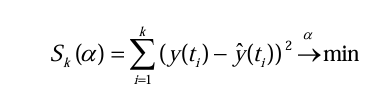

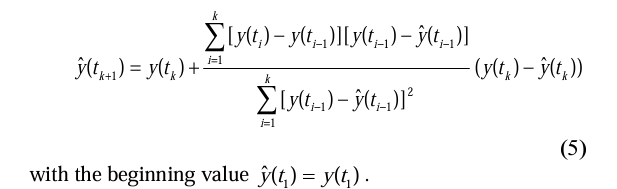

### Функция даптивного экспоненциального сглаживания

In [6]:
def expo_smooth_adaptive1(series):
    result = [series[0]]  # first value is same as series
    alpha_list = []
    up_sum=0.00000001
    low_sum=0.00000001
    # sum_se = [0]
    for k in range(1, len(series)):
            for i in range(1, k):                
                up_sum += (series[i]-series[i-1])*(series[i-1] - result[i-1])
                low_sum+= (series[i-1] - result[i-1])**2                
            y_hat = series[k-1] + up_sum/low_sum*(series[k-1] - result[k-1])
            result.append(y_hat)
            alpha_list.append(-up_sum/low_sum)
    return result, alpha_list

In [50]:
# Для работы возьмем такие данные: #Источник данных https://www.kaggle.com/datasets/jessevent/all-crypto-currencies
flatmiddle = pd.read_csv('archive/artificialWithAnomaly/artificialWithAnomaly/art_daily_flatmiddle.csv')

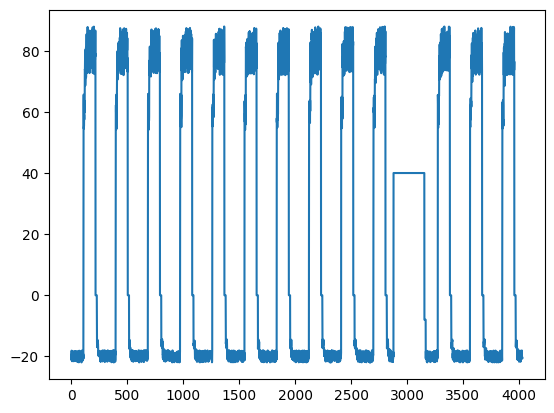

In [24]:
plt.plot(flatmiddle['value'])

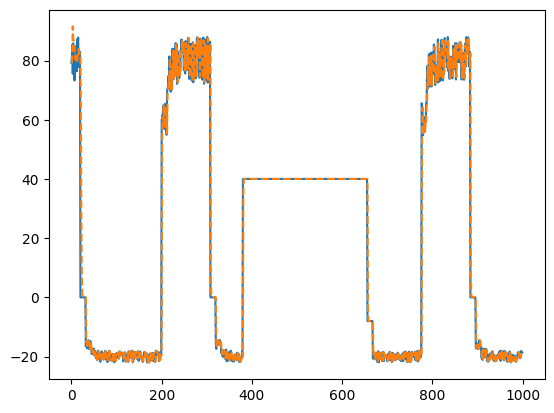

In [34]:
# применим функцию адаптивного сглаживания к данным
series = flatmiddle.iloc[2500:3500]['value'].values
plt.plot(series)
plt.plot(np.linspace(0,len(series)-1,len(series)), expo_smooth_adaptive1(series)[0], linestyle='--')

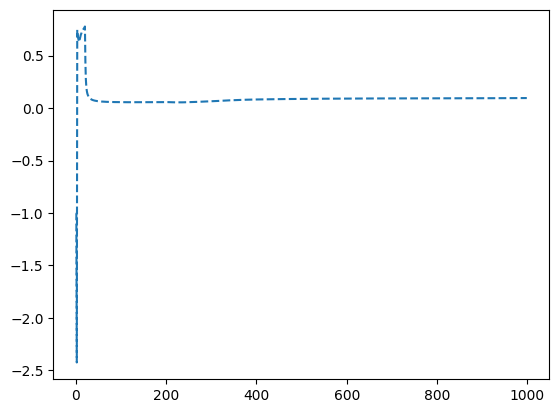

In [49]:
# Построим график расчитаной адаптивной альфы (аналония с альфой для оидинарного сглаживания)
plt.plot(np.linspace(0,len(series)-1,len(series)-1), expo_smooth_adaptive1(series)[1], linestyle='--')

In [45]:
#Будем использовать данные по курсу пары BTC-USD. 
#Источник данных https://www.kaggle.com/datasets/jessevent/all-crypto-currencies
btc_df = pd.read_csv('data/BTC-USD.csv', index_col=['timestamp'], parse_dates=['timestamp'])
# Удалим все столбцы, кроме "close"
btc_df.drop(['adjclose', 'open', 'high', 'volume', 'low'], axis= 1 , inplace= True)
# возьмем только первые 500 строк
data_new = btc_df.close.iloc[1500:3000]

In [46]:
# применим сглаживание к данным
result, alpha_lst = expo_smooth_adaptive1(data_new.values)
#result

In [47]:
data = data_new

In [48]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.02)
fig.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name='Data'),1,1)
fig.add_trace(go.Scatter(x=data.index, y=expo_smooth(data, 0.1), mode='lines', name=f'Expo Smooth normal alpha = 0.1'),1,1)
fig.add_trace(go.Scatter(x=data.index, y=expo_smooth(data, 0.8), mode='lines', name=f'Expo Smooth normal alpha = 0.8'),1,1)
fig.add_trace(go.Scatter(x=data.index, y=result, mode='lines', name='ES Adaptive'),1,1)
fig.add_trace(go.Scatter(x=data.index, y=alpha_lst, mode='lines', name='alpha'),2,1)
fig.add_trace(go.Scatter(x=data.index, y=(data - result)**2, mode='lines', name='SE'),3,1)
fig.show()

C:\Users\o2clo\AppData\Local\Temp\ipykernel_24068\3275228273.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\o2clo\AppData\Local\Temp\ipykernel_24068\3275228273.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



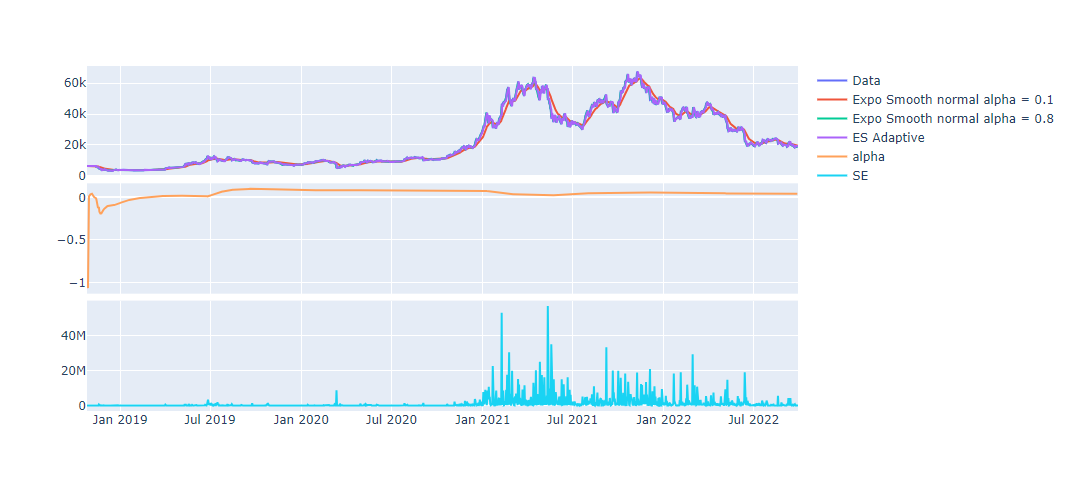